# Fair Binary Classification with SearchFair on two-dimensional toy data

Here, we present the use of SearchFair on toy data. 

## Imports

We start by importing SearchFair from the installed package.

In [1]:
from searchfair import SearchFair

Second, we load some necessary methods and numpy.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

# We are ignoring cvxpys warning about disciplined programming rules. 
import warnings
warnings.filterwarnings('ignore')

## Loading toy dataset

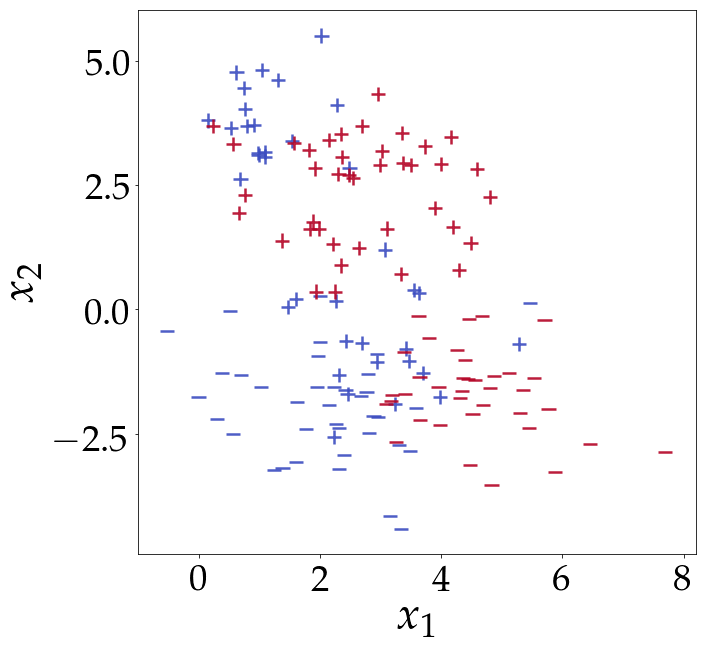

Total data points: 150
# non-protected examples: 77
# protected examples: 73
# non-protected examples in positive class: 40 (51.9%)
# protected examples in positive class: 36 (49.3%)


In [5]:
from get_synthetic_data import get_gaussian_data
from get_synthetic_data import plot_boundaries
import utils as ut

n_samples = 150
# Load Data
x_data, y_data, s_data = get_gaussian_data(n_samples=n_samples, plot_data=True)
ut.print_data_stats(s_data, y_data)
# Train Test split. Here, we choose a small number to reduce running time.
x_train, x_test, y_train, y_test, s_train, s_test = train_test_split(x_data, y_data, s_data, train_size=0.5, shuffle=True)

## Learning a fair classifier with SearchFair
### Demographic Parity

To learn a classifier with SearchFair, we need to choose a kernel between 'linear' and 'rbf', and we need to choose a fairness notion - either Demographic Parity (DDP) or Equality of Opportunity (DEO). Here, we start with a linear kernel and demographic parity. 

In [6]:
----

SyntaxError: invalid syntax (<ipython-input-6-759c4c5efcf3>, line 1)

In [8]:
fairness_notion = 'DDP' # DDP = Demographic Parity, DEO = Equality of Opportunity. 
kernel = 'linear' # 'linear', 'rbf'
verbose = True # True = SearchFair output, 2 = show also solver progress

# Regularization Parameter beta
reg_beta = 0.0001
linear_model_DDP = SearchFair(reg_beta=reg_beta, 
                              kernel=kernel, 
                              fairness_notion=fairness_notion, 
                              verbose=verbose, 
                              reason_points=0.5)
linear_model_DDP.fit(x_train, y_train, s_train=s_train)

Preprocessing...
Testing lambda_min: 0.00
Obtained: DDP = 0.0953 with lambda = 0.0000
Testing lambda_max: 1.00
Obtained: DDP = -0.5484 with lambda = 1.0000
Starting Binary Search...
----------Iteration #0----------
Testing new Lambda: 0.5000
Obtained: DDP = -0.1188 with lambda = 0.5000
----------Iteration #1----------
Testing new Lambda: 0.2500
Obtained: DDP = 0.0420 with lambda = 0.2500
----------Iteration #2----------
Testing new Lambda: 0.3750
Obtained: DDP = -0.0114 with lambda = 0.3750
----------Iteration #3----------
Testing new Lambda: 0.3125
Obtained: DDP = 0.0420 with lambda = 0.3125
----------Iteration #4----------
Testing new Lambda: 0.3438
Obtained: DDP = -0.0114 with lambda = 0.3438
----------Iteration #5----------
Testing new Lambda: 0.3281
Obtained: DDP = 0.0420 with lambda = 0.3281
----------Iteration #6----------
Testing new Lambda: 0.3359
Obtained: DDP = 0.0420 with lambda = 0.3359
----------Iteration #7----------
Testing new Lambda: 0.3398
Obtained: DDP = 0.0149 with

SearchFair(fairness_notion='DDP', fairness_regularizer='wu', gamma=None,
      kernel='linear', lambda_max=1, loss_name='hinge', max_iter=3000,
      max_search_iter=10, reason_points=0.5, reg_beta=0.0001, solver='SCS',
      stop_criterion=0.01, verbose=True, wu_bound='hinge')

In [9]:
def print_clf_stats(model, x_train, x_test, y_train, y_test, s_train, s_test):
    train_acc = ut.get_accuracy(np.sign(model.predict(x_train)), y_train)
    test_acc = ut.get_accuracy(np.sign(model.predict(x_test)), y_test)
    test_DDP, test_DEO = ut.compute_fairness_measures(model.predict(x_test), y_test, s_test)
    train_DDP, train_DEO = ut.compute_fairness_measures(model.predict(x_train), y_train, s_train)

    print(10*'-'+"Train"+10*'-')
    print("Accuracy: %0.4f%%" % (train_acc * 100))
    print("DDP: %0.4f%%" % (train_DDP * 100), "DEO: %0.4f%%" % (train_DEO * 100))
    print(10*'-'+"Test"+10*'-')
    print("Accuracy: %0.4f%%" % (test_acc * 100))
    print("DDP: %0.4f%%" % (test_DDP * 100), "DEO: %0.4f%%" % (test_DEO * 100))

Let us check the accuracy and fairness results on the dataset. 

In [10]:
print_clf_stats(linear_model_DDP, x_train, x_test, y_train, y_test, s_train, s_test)

----------Train----------
Accuracy: 78.6667%
DDP: -1.1380% DEO: 33.3333%
----------Test----------
Accuracy: 81.3333%
DDP: 1.4957% DEO: 19.6970%


Finally, we can take a look at the classifier for this dataset. 

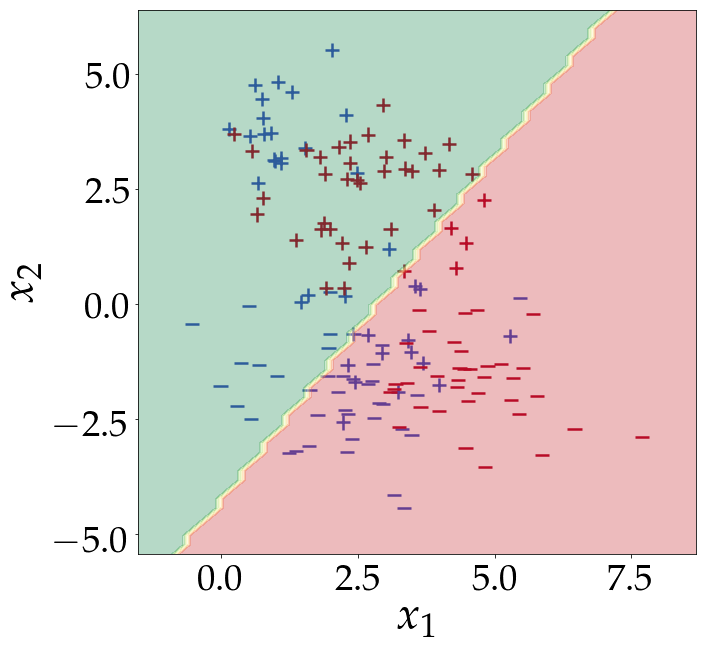

In [11]:
plot_boundaries(linear_model_DDP, x_data, y_data, s_data, num_to_draw=1000)

### Equality of Opportunity

Now, let us improve Equality of Opportunity using an rbf kernel. 

In [12]:
fairness_notion = 'DEO' # DDP = Demographic Parity, DEO = Equality of Opportunity. 
kernel = 'rbf' # 'linear', 'rbf'
verbose = True

# Regularization Parameter beta
reg_beta = 0.0001
rbf_model_DEO = SearchFair(reg_beta=reg_beta, kernel=kernel, fairness_notion=fairness_notion, verbose=verbose)
rbf_model_DEO.fit(x_train, y_train, s_train=s_train)

# Evaluate model
print_clf_stats(rbf_model_DEO, x_train, x_test, y_train, y_test, s_train, s_test)

Preprocessing...
Testing lambda_min: 0.00
Obtained: DEO = 0.1111 with lambda = 0.0000
Testing lambda_max: 1.00
Obtained: DEO = -0.8333 with lambda = 1.0000
Starting Binary Search...
----------Iteration #0----------
Testing new Lambda: 0.5000
Obtained: DEO = -0.7222 with lambda = 0.5000
----------Iteration #1----------
Testing new Lambda: 0.2500
Obtained: DEO = -0.3889 with lambda = 0.2500
----------Iteration #2----------
Testing new Lambda: 0.1250
Obtained: DEO = 0.1111 with lambda = 0.1250
----------Iteration #3----------
Testing new Lambda: 0.1875
Obtained: DEO = 0.1111 with lambda = 0.1875
----------Iteration #4----------
Testing new Lambda: 0.2188
Obtained: DEO = 0.1111 with lambda = 0.2188
----------Iteration #5----------
Testing new Lambda: 0.2344
Obtained: DEO = 0.1111 with lambda = 0.2344
----------Iteration #6----------
Testing new Lambda: 0.2422
Obtained: DEO = -0.3333 with lambda = 0.2422
----------Iteration #7----------
Testing new Lambda: 0.2383
Obtained: DEO = 0.1111 with

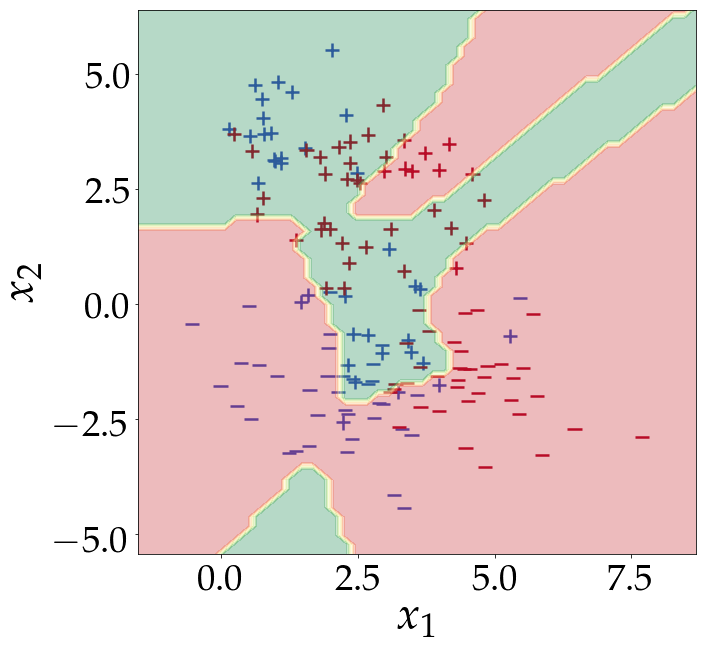

In [13]:
plot_boundaries(rbf_model_DEO, x_data, y_data, s_data)